In [3]:
#Read in, average and plot tide gauge data (example for Milford Haven) from BODC https://www.bodc.ac.uk/data/hosted_data_systems/sea_level/uk_tide_gauge_network/processed/
import numpy as np
import io
from pathlib import Path
import matplotlib.pyplot as plt

TG='MHA' #Tide Gauge code in file name
#Read in and average each year
mean_sl=np.zeros(2020)
for year in range (1953,2020):
    data_file=Path(f'{year}{TG}.txt')
    if data_file.is_file():
        data=np.genfromtxt(f'{year}MHA.txt',skip_header=12, usecols=(3),dtype=str)
        data=np.char.strip(data,chars="N,T,M") #'N' (missing values are removed later), 'T' is interpolated values
        #data=data[] #Remove 'M' values flagged by BODC as unrealistic M
        data = data.astype(np.float)
        data = data[data != -99.0000]
        mean_sl[year]=(np.mean(data))
    else:
        print(year)
        


1955
1956
1957
1958
1959
1960
1963
1966


In [6]:
#Interpolate missing years, not actually used in the MHA case as the gaps between early years was large

from scipy.interpolate import interp1d

y = mean_sl[1967:2021]
xnew = np.arange(len(y))

zero_idx = np.where(y==0)
xold = np.delete(xnew,zero_idx)
yold = np.delete(y, zero_idx)
f = interp1d(xold,yold)
ynew = f(xnew)

###### pwd

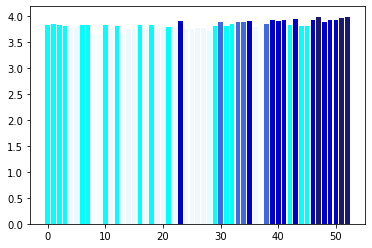

In [7]:
#
col = []
for val in ynew:
    if val < 3.4:
        col.append('white')
    elif val <= 3.5:
        col.append('green')
    elif val <= 3.65:
        col.append('red')
    elif val <= 3.7:
        col.append('azure')#three
    elif val <= 3.75:
        col.append('lightcyan')#one
    elif val <= 3.8:
        col.append('aliceblue')#14
    elif val <= 3.85:
        col.append('aqua')#17
    elif val <= 3.9:
        col.append('royalblue')#4
    elif val <= 3.95:
        col.append('mediumblue')#10
    elif val <= 3.9:
        col.append('red')
    elif val <= 4.0:
        col.append('midnightblue')#3
    else:
        col.append('red')

plt.bar(xnew,ynew, color=col)
plt.show()

In [7]:
len(ynew)

53

In [8]:
53/4


13.25

In [ ]:
13.25*